# [Data Set](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank.
- **Complain:** customer has complaint or not.
- **Satisfaction Score:** Score provided by the customer for their complaint resolution.
- **Card Type:** type of card hold by the customer.
- **Points Earned:** the points earned by the customer for using credit card.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from src.plot_function import *


custom_palette = {
    'Left': '#c53b53',
    'Non-Left': '#394b70'
}
sns.color_palette(list(custom_palette.values()))

[(0.7725490196078432, 0.23137254901960785, 0.3254901960784314),
 (0.2235294117647059, 0.29411764705882354, 0.4392156862745098)]

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('data/Customer-Churn-Records.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
df['Exited'] = df['Exited'].map({0: 'Non-Left', 1: 'Left'})

In [9]:
df['Geography'].unique(), df['Gender'].unique(), df['Tenure'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0]))

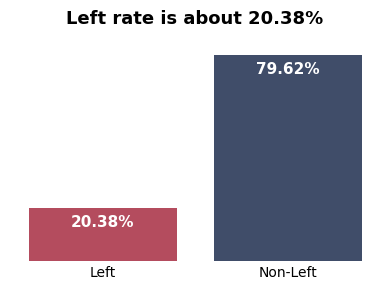

In [10]:
hue='Exited'

plot_seaborn_bar(df, custom_palette, hue)

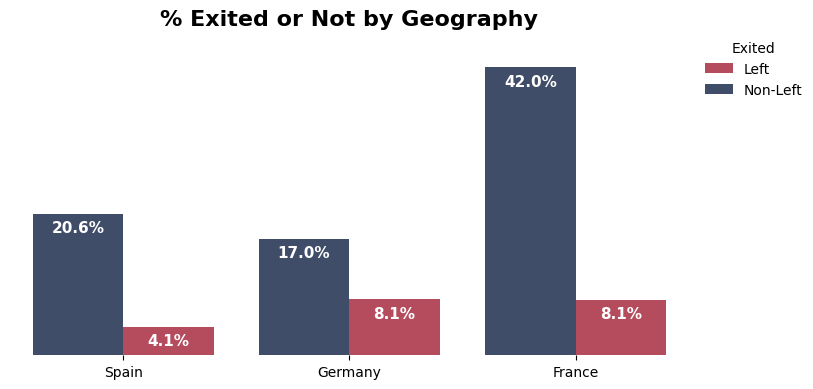

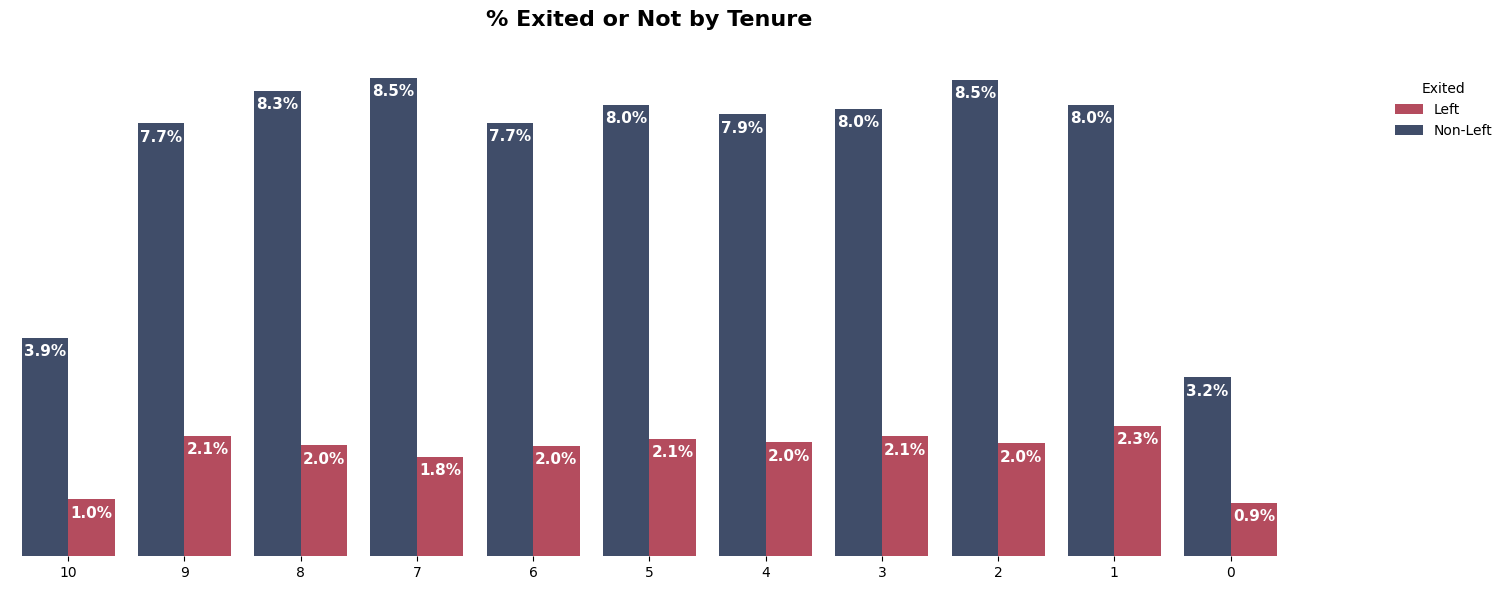

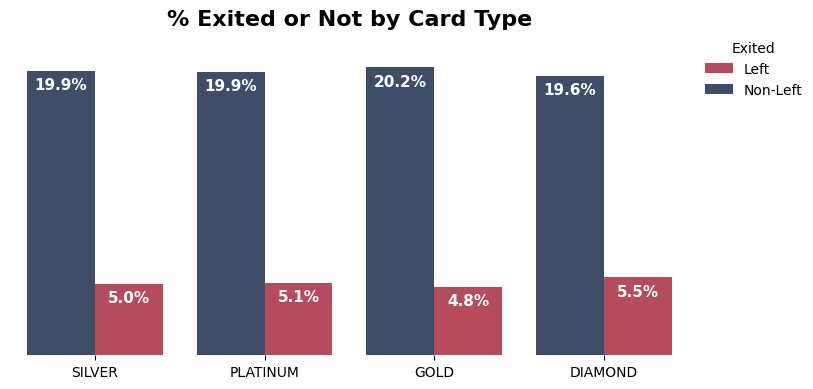

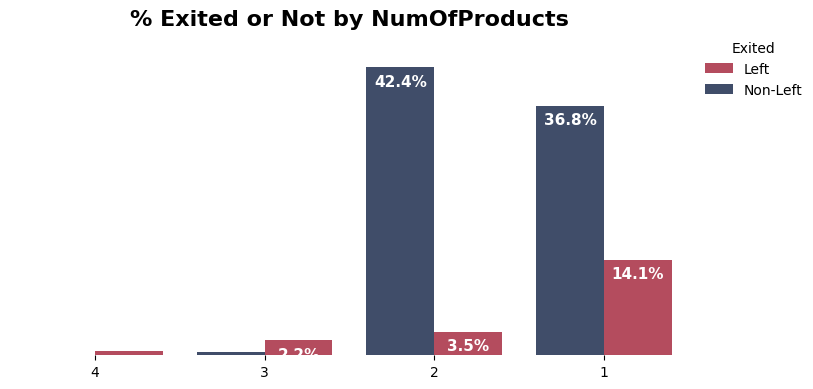

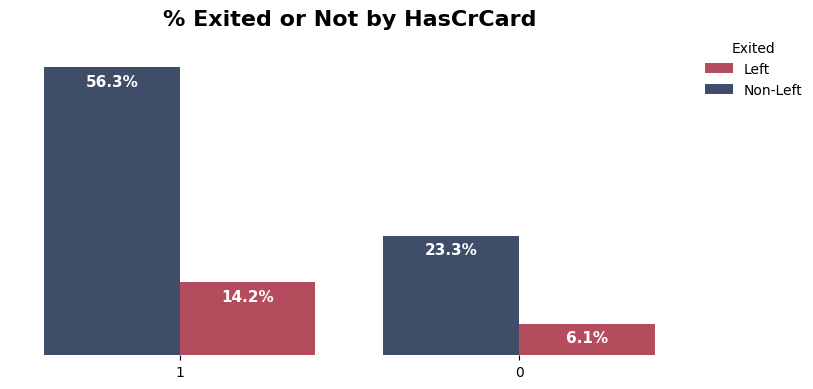

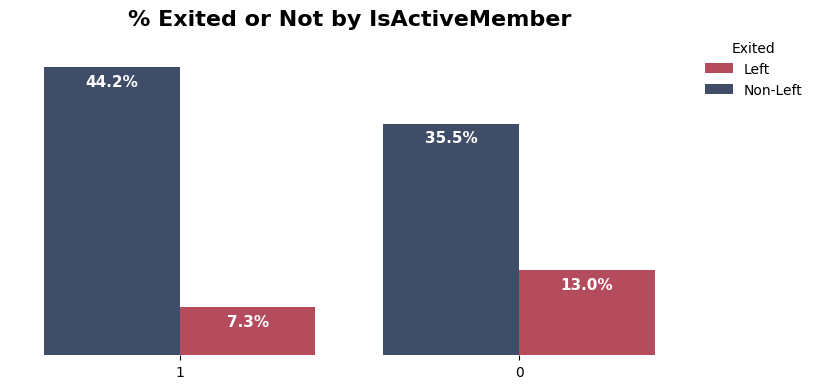

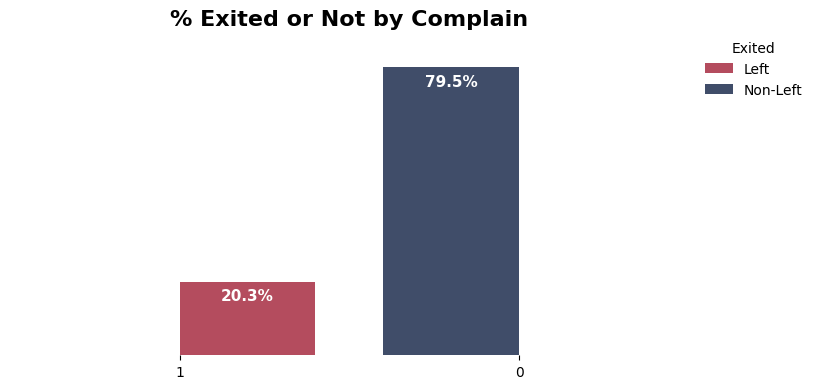

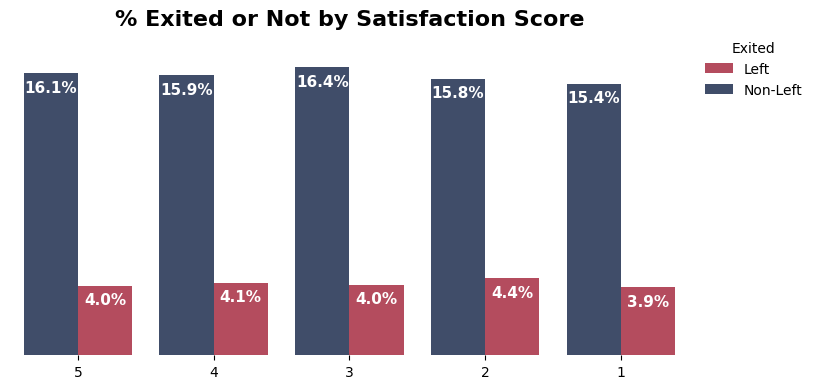

In [11]:
barplot_features = ['Geography', 'Tenure', 'Card Type', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']

hue = 'Exited'
plot_type='bar'
plot_custom_catplot(df, custom_palette, barplot_features, plot_type, hue)

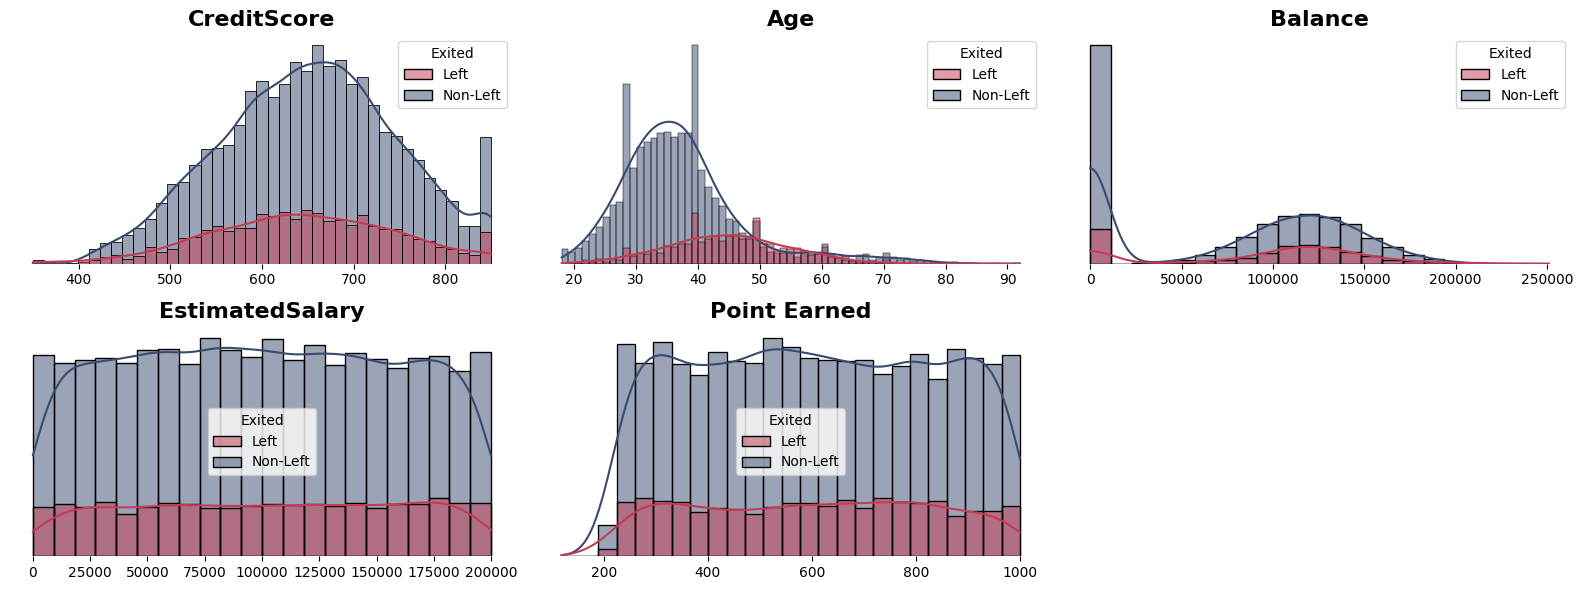

In [12]:
histogram_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']
hue_choice='Exited'
data_visualizations(df=df, features=histogram_features, histogram=True, custom_palette=custom_palette, 
                    hue=hue_choice, kde=True, figsize=(16, 6))

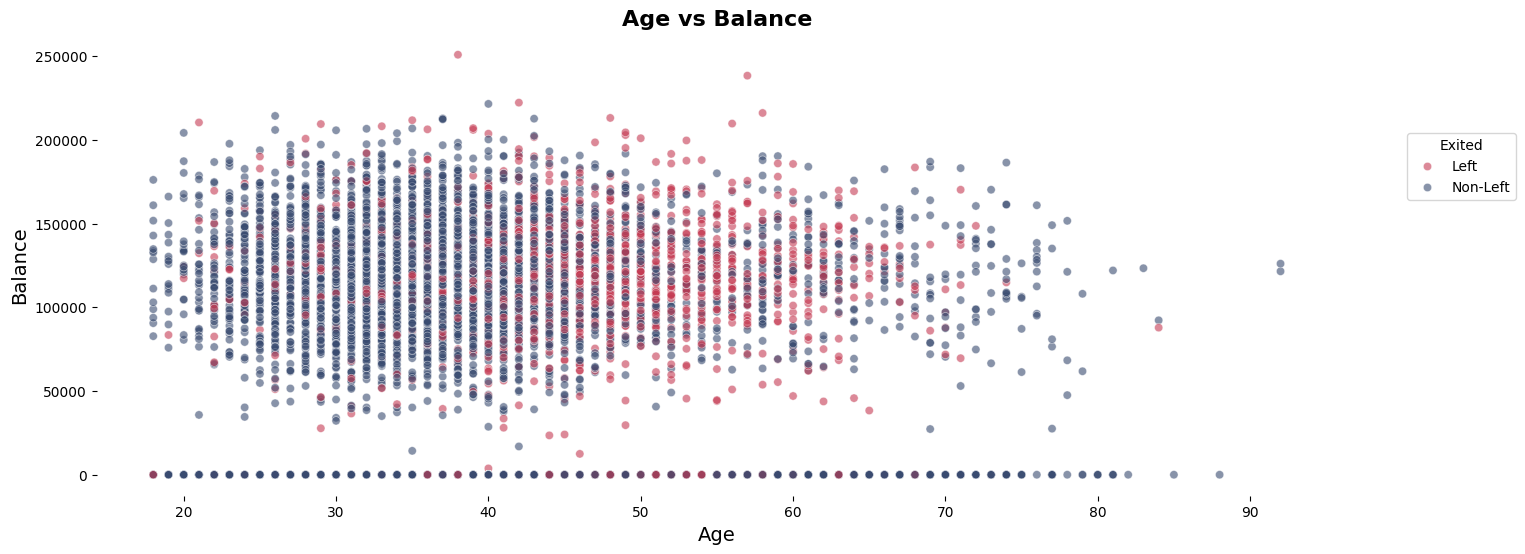

In [13]:
x = 'Age'
y = 'Balance'
hue = 'Exited'

plot_custom_scatterplot(df, x, y, hue, custom_palette)

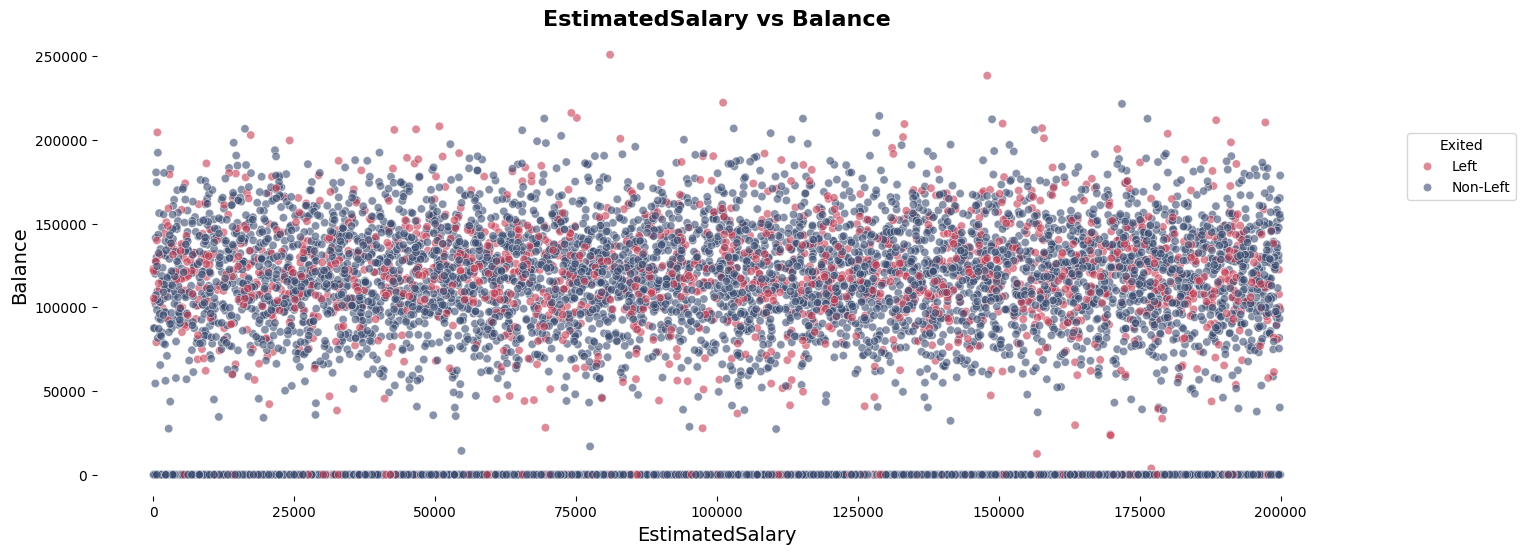

In [14]:
x = 'EstimatedSalary'
y = 'Balance'
hue = 'Exited'

plot_custom_scatterplot(df, x, y, hue, custom_palette) #= ['#394b70', '#ff9e64', '#ff007c', ])

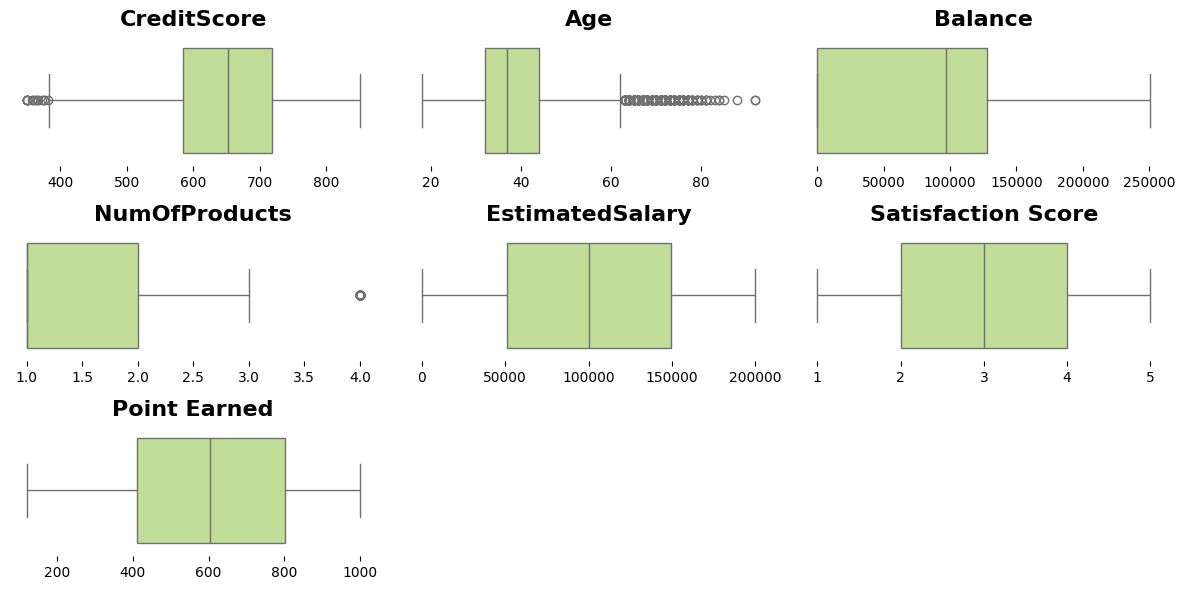

In [15]:
boxplot_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

data_visualizations(df, boxplot_features, boxplot=True, figsize=(12, 6))

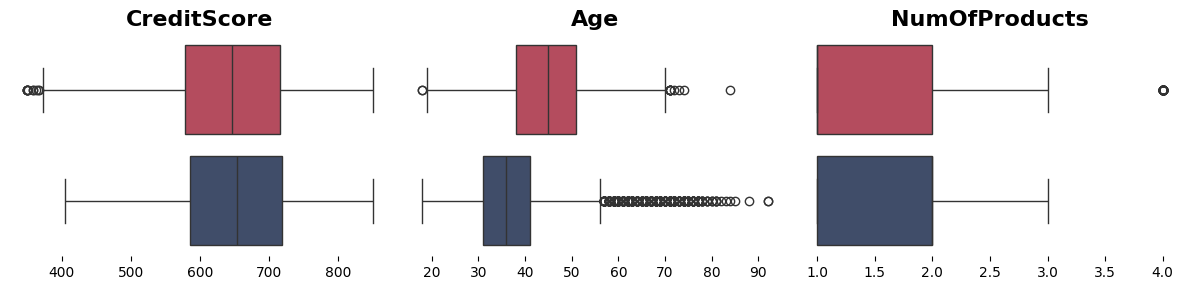

In [16]:
boxplot_features = ['CreditScore', 'Age', 'NumOfProducts']
hue = 'Exited'
data_visualizations(df, boxplot_features, boxplot=True, hue=hue, custom_palette=custom_palette, figsize=(12, 3))

# Features Engineer

In [17]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
df['AgeGroup'].unique()

['35-44', '45-54', '25-34', '18-24', '55-64', '65+', NaN]
Categories (6, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

In [18]:
df['BalanceCategory'] = pd.cut(df['Balance'], bins=[-float('inf'), 0, 10000, 20000, float('inf')], labels=['Negative', 'Low', 'Medium', 'High'])
df['BalanceCategory'].unique()

['Negative', 'High', 'Medium', 'Low']
Categories (4, object): ['Negative' < 'Low' < 'Medium' < 'High']

In [19]:
df['ProductsActive'] = df['NumOfProducts'] * df['IsActiveMember']

In [20]:
df['AgeBalanceRatio'] = df['Age'] / (df['Balance'] + 1) 

In [21]:
df['TenureMonths'] = df['Tenure'] * 12  # If 'Tenure' is in years
df['TenureMonths']

0        24
1        12
2        96
3        12
4        24
       ... 
9995     60
9996    120
9997     84
9998     36
9999     48
Name: TenureMonths, Length: 10000, dtype: int64

In [22]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'Balance']])
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Age', 'Balance']))
# df = pd.concat([df, df_poly], axis=1)
df_poly

,Age,Balance,Age^2,Age Balance,Balance^2
0,42.0,0.00,1764.0,0.00,0.000000e+00
1,41.0,83807.86,1681.0,3436122.26,7.023757e+09
2,42.0,159660.80,1764.0,6705753.60,2.549157e+10
3,39.0,0.00,1521.0,0.00,0.000000e+00
4,43.0,125510.82,1849.0,5396965.26,1.575297e+10
...,...,...,...,...,...
9995,39.0,0.00,1521.0,0.00,0.000000e+00
9996,35.0,57369.61,1225.0,2007936.35,3.291272e+09
9997,36.0,0.00,1296.0,0.00,0.000000e+00
9998,42.0,75075.31,1764.0,3153163.02,5.636302e+09


In [23]:
scaler = StandardScaler()
df[['Balance_StandardScaler', 'CreditScore_StandardScaler']] = scaler.fit_transform(df[['Balance', 'CreditScore']])

# Encoder

## LabelEncoder

In [24]:
label_encoder = LabelEncoder()

In [25]:
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

In [26]:
df['Geography_Encoded'] = label_encoder.fit_transform(df['Geography'])

## OrdinalEncoder

In [27]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [28]:
ordinal_encoder = OrdinalEncoder(categories=[['DIAMOND', 'PLATINUM', 'GOLD', 'SILVER']])
df['Card_Type_Encoded'] = ordinal_encoder.fit_transform(df[['Card Type']])